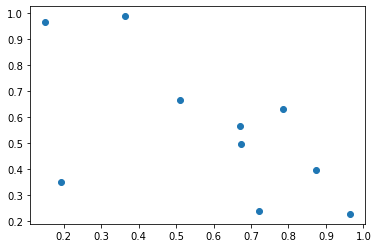

In [91]:
import numpy as np
import matplotlib.pyplot as plt
points = np.random.random((10, 2))

plt.scatter(points[:, 0], points[:, 1])
plt.show()

def point3_in_circle(p1, p2, p3):
    center = (p2 + p1) / 2
    radius = (p2 - p1)
    radius2 = np.sqrt(radius[0]**2 + radius[1]**2) / 2
    p3_to_center = (p3 - center)
    radius_3 = np.sqrt(p3_to_center[0]**2 + p3_to_center[1]**2)
    return radius_3 <= radius2

def farest_point(points, dest_point):
    max_distance = 0
    max_index = 0
    for i in range(len(points)):
        dis = points[i] - dest_point
        dis = dis[0] ** 2 + dis[1] ** 2
        if dis > max_distance:
            max_distance = dis
            max_index = i

    return max_index

In [ ]:
# 1.choose two random points, draw a circle
# 2.check all other points are in the circle, if true then return the circle
# 3.if a points is not in the circle, find the fastest points to it in the point sets
# 4.draw a circle and return to step 2
# !!it may not return the best rest, and will be 5%-20% bigger than minimum tangent circle
# time consuming is O(N^2)

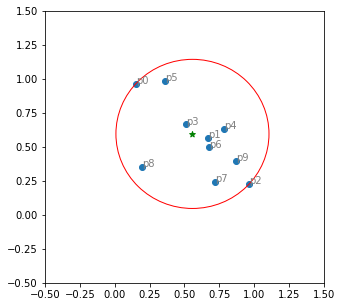

In [92]:
circle_points = np.array(points[:2, :])
other_points = np.array(points[2:, :])

i = 0
while i < len(other_points):
    if not point3_in_circle(circle_points[0], circle_points[1], other_points[i]):
        farest_point_index = farest_point(points, other_points[i])
        circle_points = [other_points[i], points[farest_point_index]]
        points_mask = np.ones(len(points), bool)
        points_mask[farest_point_index] = 0
        points_mask[i] = 0
        other_points = points[points_mask, ]
        i = 0
        continue
    i += 1

center = (circle_points[0] + circle_points[1])/2
r = circle_points[0] - circle_points[1]
r = np.sqrt(r[0]**2 + r[1]**2) / 2



fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
plt.scatter(points[:, 0], points[:, 1])

for i in range(len(points)):
    plt.text(points[i][0], points[i][1], 'p%d' % i, color='grey')

plt.scatter(center[0], center[1], color='g', marker='*')
circle = plt.Circle(center, r, fill=False, color='r')
ax.add_artist(circle)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()